In [1]:
# install machine gnostics
# recommended to run in a new virtual environment

# !pip install machinegnostics #<-- Uncomment this line to install the package

# Binary Classification with Logistic Regression

### **Overview**
The **Machine Gnostics LogisticRegressor** provides robust binary classification using the same Riemannian geometric framework as our regression models. Instead of minimizing squared errors, it optimizes classification boundaries by maximizing **Information** and minimizing **Entropy** through the **Ideal Gnostic Cycle (IGC)**.

Key advantages for classification:
- Automatic robustness to mislabeled samples
- Dynamic weighting reduces impact of ambiguous boundary points
- Handles non-linearly separable data through polynomial features
- Gnostic probability estimation for reliable confidence scores

---

### **Theoretical Background**

The LogisticRegressor implements **Gnostic Weighted Classification** with these key features:

*   **Thermodynamic Classification:**
    Rather than maximizing likelihood, the model minimizes classification entropy, finding decision boundaries that maximize information content.

*   **Dynamic Sample Weighting:**
    Each sample receives a **Gnostic Weight** based on its fidelity. Ambiguous points near the decision boundary or mislabeled samples automatically receive lower weights, preventing them from distorting the classifier.

*   **Polynomial Decision Boundaries:**
    Supports polynomial feature expansion for non-linear decision boundaries, making it suitable for complex classification tasks.

*   **Robust Probability Estimation:**
    Predicted probabilities reflect true confidence, automatically accounting for data quality and class overlap.

***

## Example 1: Simple Logistic Regression

A basic example showing how to use the Logistic Regressor on a non-linearly separable dataset.

In [1]:
import numpy as np
from machinegnostics.models import LogisticRegressor
from machinegnostics.data import make_moons_check_data

# Generate two-moons dataset (non-linearly separable)
X, y = make_moons_check_data(n_samples=30, noise=0.2)

print(f"Dataset generated: {X.shape[0]} samples, {X.shape[1]} features")
print(f"Class distribution: {np.sum(y==0)} samples in class 0, {np.sum(y==1)} samples in class 1")

Dataset generated: 30 samples, 2 features
Class distribution: 15 samples in class 0, 15 samples in class 1


In [2]:
# Fit the model with polynomial features (degree=3 for non-linear boundary)
model = LogisticRegressor(degree=3, verbose=False, early_stopping=True, tolerance=0.001)
model.fit(X, y)

# Make predictions
y_pred = model.predict(X)
y_proba = model.predict_proba(X)

print("Model fitted successfully!")
print(f"Number of coefficients: {len(model.coefficients)}")
print(f"Training complete after {len([h for h in model._history if h['log_loss'] is not None])} iterations")
print(f"\nPredictions (first 10): {y_pred[:10]}")
print(f"Probabilities (first 10): {np.round(y_proba[:10], 3)}")

Model fitted successfully!
Number of coefficients: 10
Training complete after 11 iterations

Predictions (first 10): [0 0 1 0 1 0 0 0 1 0]
Probabilities (first 10): [0.    0.342 1.    0.    0.999 0.    0.003 0.    1.    0.   ]


In [3]:
# Evaluate performance
from machinegnostics.metrics import accuracy_score, f1_score, precision_score, recall_score

acc = accuracy_score(y, y_pred)
prec = precision_score(y, y_pred)
rec = recall_score(y, y_pred)
f1 = f1_score(y, y_pred)

print("Performance Metrics:")
print("=" * 50)
print(f"Accuracy:  {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall:    {rec:.4f}")
print(f"F1-Score:  {f1:.4f}")
print("=" * 50)

Performance Metrics:
Accuracy:  1.0000
Precision: 1.0000
Recall:    1.0000
F1-Score:  1.0000


### Basic Visualization: Decision Boundary

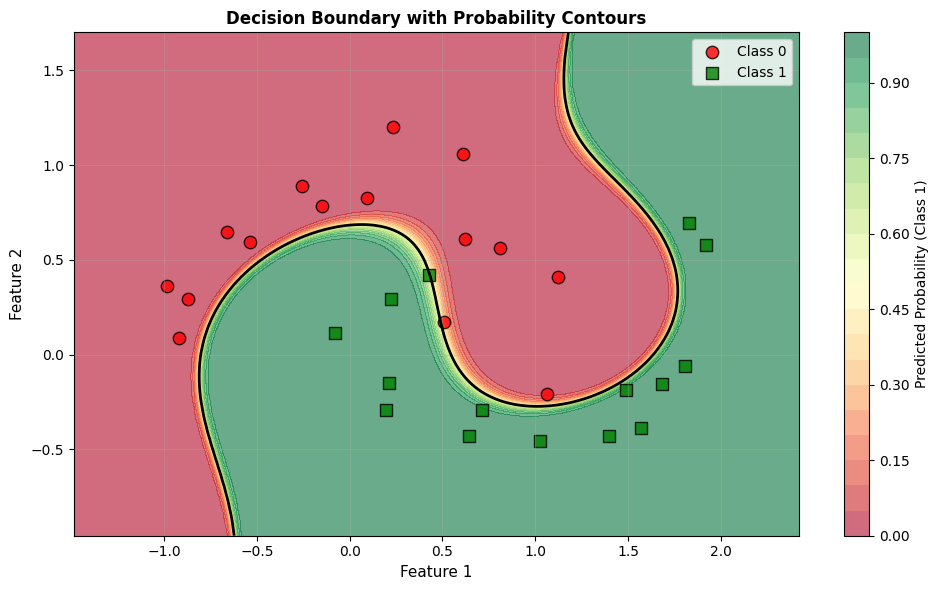

Note: The black line shows the 0.5 probability threshold (decision boundary)


In [4]:
import matplotlib.pyplot as plt

# Create decision boundary plot
x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                     np.linspace(y_min, y_max, 200))

# Predict on grid
grid = np.c_[xx.ravel(), yy.ravel()]
Z = model.predict_proba(grid)
Z = Z.reshape(xx.shape)

# Plot
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, levels=20, cmap='RdYlGn', alpha=0.6)
plt.colorbar(label='Predicted Probability (Class 1)')
plt.contour(xx, yy, Z, levels=[0.5], colors='black', linewidths=2)

# Plot data points
plt.scatter(X[y==0, 0], X[y==0, 1], c='red', s=80, edgecolors='k', 
            label='Class 0', marker='o', alpha=0.8)
plt.scatter(X[y==1, 0], X[y==1, 1], c='green', s=80, edgecolors='k', 
            label='Class 1', marker='s', alpha=0.8)

plt.xlabel('Feature 1', fontsize=11)
plt.ylabel('Feature 2', fontsize=11)
plt.title('Decision Boundary with Probability Contours', fontsize=12, fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print("Note: The black line shows the 0.5 probability threshold (decision boundary)")

## Example 2: Understanding Gnostic Weights

This example shows how the model automatically assigns weights to samples based on their reliability.

In [5]:
# Access gnostic weights
weights = model.weights

print("Gnostic Weights Summary:")
print("-" * 50)
print(f"Total samples: {len(weights)}")
print(f"Mean weight:   {np.mean(weights):.4f}")
print(f"Min weight:    {np.min(weights):.4f}")
print(f"Max weight:    {np.max(weights):.4f}")
print(f"Std weight:    {np.std(weights):.4f}")

# Identify samples with low weights (potential outliers or ambiguous points)
low_weight_threshold = np.mean(weights) - np.std(weights)
low_weight_indices = np.where(weights < low_weight_threshold)[0]

print(f"\nSamples with low weights ({len(low_weight_indices)} total):")
for idx in low_weight_indices[:10]:  # Show first 10
    print(f"  Sample {idx}: weight = {weights[idx]:.4f}, true class = {y[idx]}, predicted = {y_pred[idx]}")
    
print("\nNote: Low-weight samples are often near decision boundary or mislabeled")

Gnostic Weights Summary:
--------------------------------------------------
Total samples: 30
Mean weight:   1.0000
Min weight:    1.0000
Max weight:    1.0000
Std weight:    0.0000

Samples with low weights (0 total):

Note: Low-weight samples are often near decision boundary or mislabeled


## Model History

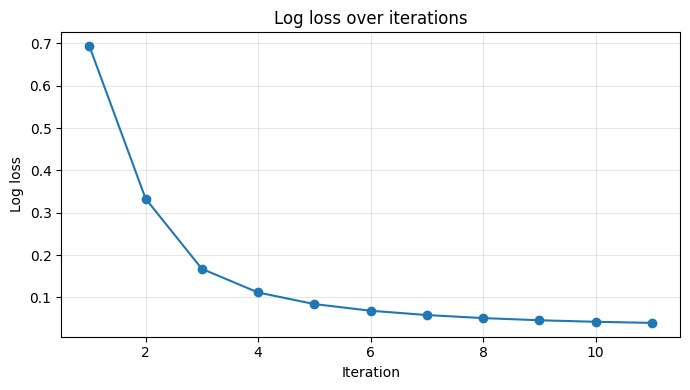

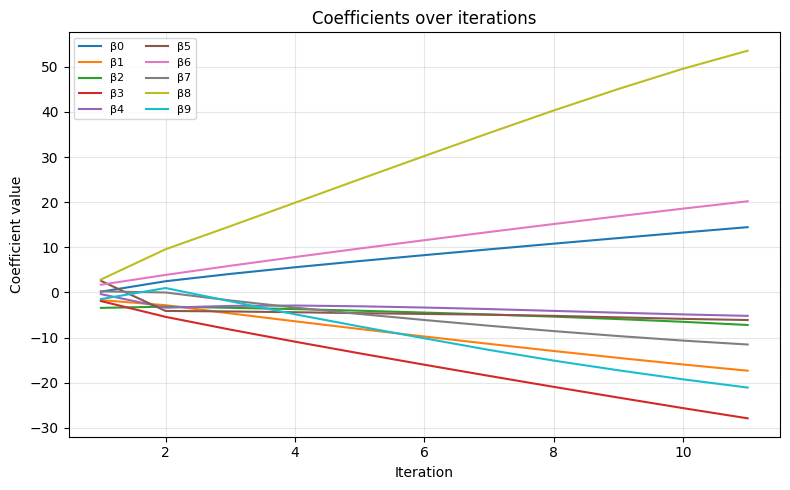

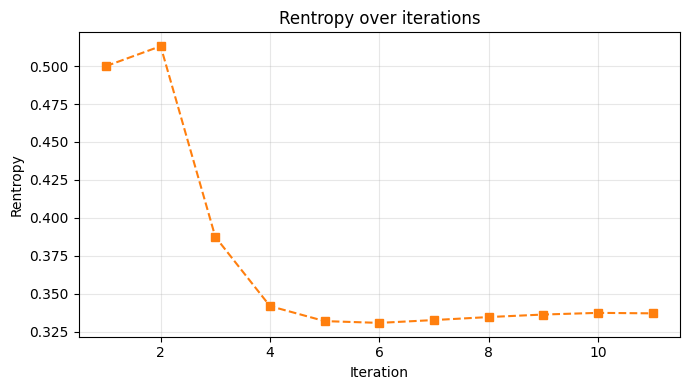

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Use model._history or your provided history list
hist = model._history  # or replace with the list you printed

iterations = np.array([int(rec.get("iteration", i + 1)) for i, rec in enumerate(hist)], dtype=int)
log_loss = np.array([float(rec.get("log_loss", np.nan)) for rec in hist], dtype=float)
rentropy = np.array([float(rec.get("rentropy", np.nan)) for rec in hist], dtype=float)


# Extract coefficients to shape (n_iter, n_coef)
coef_list = [np.asarray(rec.get("coefficients"), dtype=float).ravel() for rec in hist if rec.get("coefficients") is not None]
coeffs = np.vstack(coef_list) if coef_list else None

# 1) Log-loss vs iteration
plt.figure(figsize=(7,4))
plt.plot(iterations, log_loss, "o-", color="tab:blue")
plt.xlabel("Iteration")
plt.ylabel("Log loss")
plt.title("Log loss over iterations")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

# 2) Coefficients vs iteration (one line per coefficient)
if coeffs is not None:
    plt.figure(figsize=(8,5))
    for j in range(coeffs.shape[1]):
        plt.plot(iterations, coeffs[:, j], label=f"β{j}")
    plt.xlabel("Iteration")
    plt.ylabel("Coefficient value")
    plt.title("Coefficients over iterations")
    plt.legend(ncol=2, fontsize=8)
    plt.grid(alpha=0.3)
    plt.tight_layout()
    plt.show()


# 3) Rentropy vs iteration
plt.figure(figsize=(7,4))
plt.plot(iterations, rentropy, "s--", color="tab:orange")
plt.xlabel("Iteration")
plt.ylabel("Rentropy")
plt.title("Rentropy over iterations")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()
